<a href="https://colab.research.google.com/github/HiraJamshed20/Pneumonia-detection-using-Xrays/blob/master/Pneumonia_detection_using_X_rays_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup

**Installing required libraries**

In [ ]:
!pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl

!pip install fastai==0.7.0

     |████████████████████████████████| 69.4MB 58.5MB/s 
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 1.0.0 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1
  Using cached https://files.pythonhosted.org/packages/50/6d/9d0d6e17a78b0598d5e8c49a0d03ffc7ff265ae62eca3e2345fab14edb9b/fastai-0.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5b/a5/e8b50b55b1abac9f1e3346c4242f1e42a82d368a8442cbd50c532922f6c4/torch-0.3.1-cp36-cp36m-manylinux1_x86_64.whl
ERROR: torchvision 0.4.2 has requirement torch==1.3.1, but you'll have torch 0.3.1 which is incompatible.
  Found existing installation: torch 1.0.0
    Uninstalling torch-1.0.0:
      Successfully uninstalled torch-1.0.0
  Found existing installation: fastai 1.0.60
    Uninstalling fastai-1.0.60:
      Successfully uninstalled fastai-1.0.60


In [ ]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
# Install Kaggle library
!pip install -U kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.6)


**Downloading dataset through the kaggle API**

In [ ]:
# Colab library to upload files to notebook
from google.colab import files
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!ls

chest_xray  chest-xray-pneumonia.zip  data  models


In [ ]:
!mkdir ~/.kaggle

In [ ]:
ls

data@  kaggle.json  models@


In [ ]:
!mv kaggle.json ~/.kaggle/kaggle.json

In [ ]:
ls

data@  models@


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# import os
# os.environ['KAGGLE_USERNAME'] = 'hirajamshed'
# os.environ['KAGGLE_KEY'] = ''
!export KAGGLE_USERNAME=[hirajamshed]
!export KAGGLE_KEY=420af4b6f73528a7a7e585127e394908
!sudo kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip /content/chest-xray-pneumonia.zip


 99% 2.28G/2.29G [00:29<00:00, 100MB/s] 
100% 2.29G/2.29G [00:29<00:00, 82.7MB/s]
Archive:  /content/chest-xray-pneumonia.zip
  inflating: chest_xray/__MACOSX/._chest_xray  
  inflating: chest_xray/__MACOSX/chest_xray/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/._test  
  inflating: chest_xray/__MACOSX/chest_xray/._train  
  inflating: chest_xray/__MACOSX/chest_xray/test/._.DS_Store  
  inflating: chest_xray/__MACOSX/chest_xray/test/._NORMAL  
  inflating: chest_xray/__MACOSX/chest_xray/test/._PNEUMONIA  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0001-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0003-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0005-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0006-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0007-0001.jpeg  
  inflating: chest_xray/__MACOSX/chest_xray/test/NORMAL/._IM-0009-0001.jpeg  
  infla

In [ ]:
!ls

chest_xray  chest-xray-pneumonia.zip  data  models


# Classifier Model - Pneumonia detection using X-rays

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy

In [ ]:
path = '/content/chest_xray'

In [ ]:
# fnames = get_image_files(path)

In [ ]:
# fnames[0:5]

In [ ]:
bs = 32

In [ ]:
data = ImageDataBunch.from_folder(path, train="train", valid="val", test="test", ds_tfms=get_transforms(), size=224, bs=bs, classes = ['PNEUMONIA', 'NORMAL']).normalize(imagenet_stats)

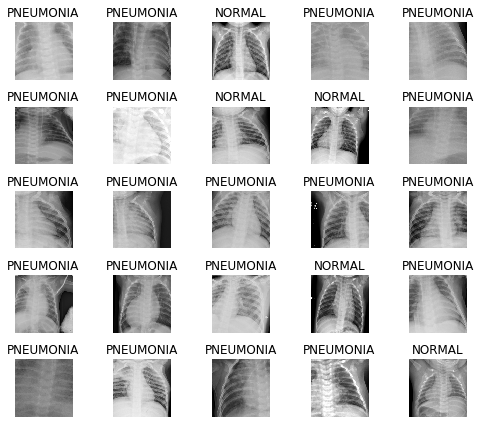

In [ ]:
data.show_batch(rows=5, figsize=(7,6))

In [ ]:
print(data.classes)
len(data.classes)

['PNEUMONIA', 'NORMAL']


2

In [ ]:
f_score = partial(fbeta, beta = 1, sigmoid=False)

**Using the pre-trained vgg19 model in the fastai library**

In [ ]:
#learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn = cnn_learner(data, models.vgg19_bn, metrics=[error_rate, accuracy], callback_fns=ShowGraph)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.374935,0.756163,0.250000,0.750000,04:29
1,0.241949,0.407311,0.187500,0.812500,04:21
2,0.163052,0.582337,0.312500,0.687500,04:22
3,0.141696,0.307748,0.125000,0.875000,04:22


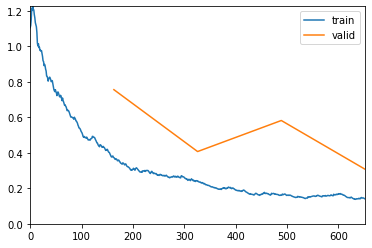

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

Plotting top losses - many of them are accurate 

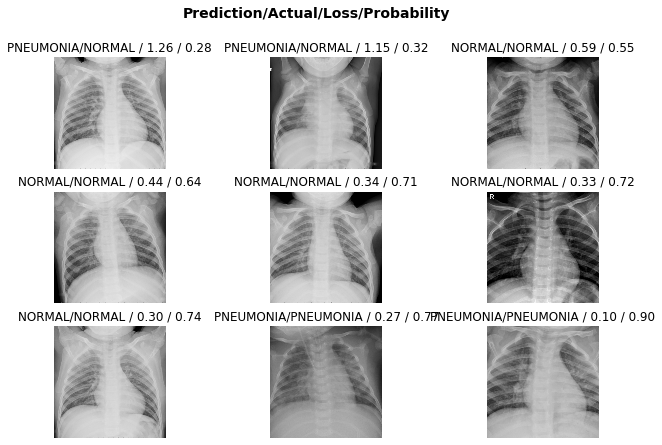

In [ ]:
interp.plot_top_losses(9, figsize=(11,7))

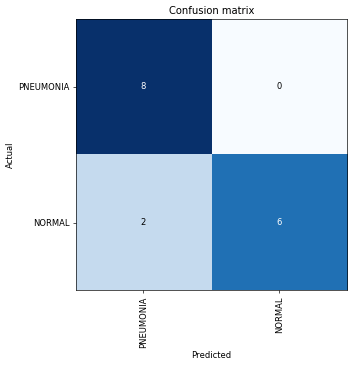

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

**Confusion matrix calculations - for the above matrix**

Precision: 100%

Recall: 6/8 = 0.75%

F1 score: 0.83

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


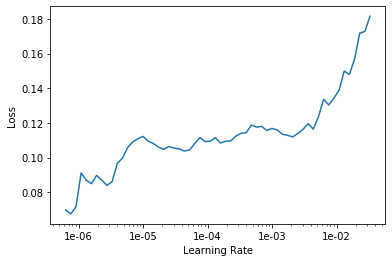

In [ ]:
# learn.lr_find()
learn.recorder.plot()

In [ ]:
# learn.load('stage-1')

Fine-tuning the learning rate and running it for 5 epochs - accuracy of almost a 100% recieved

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.139237,0.448923,0.187500,0.812500,04:35
1,0.122638,0.559331,0.375000,0.625000,04:37
2,0.135505,0.285354,0.125000,0.875000,04:38
3,0.130564,0.310304,0.125000,0.875000,04:35
4,0.135628,0.436113,0.312500,0.687500,04:38


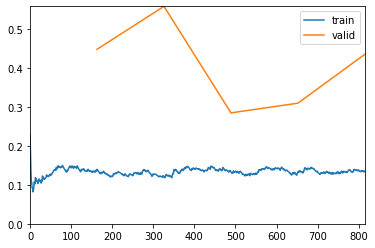

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-8, 1e-7))

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


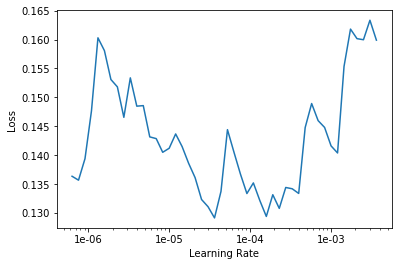

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.125142,0.283169,0.125000,0.875000,04:36
1,0.127794,0.173414,0.000000,1.000000,04:37
2,0.120846,0.191767,0.062500,0.937500,04:38
3,0.092354,0.183810,0.062500,0.937500,04:38


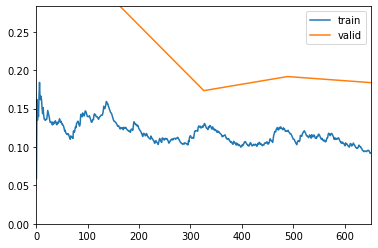

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=slice(2e-6, 1e-5))

epoch,train_loss,valid_loss,error_rate,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


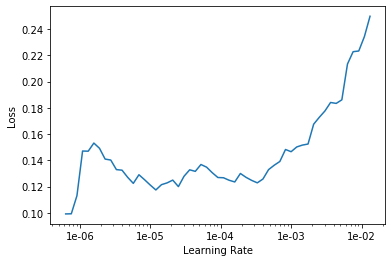

In [ ]:
learn.lr_find()
learn.recorder.plot()

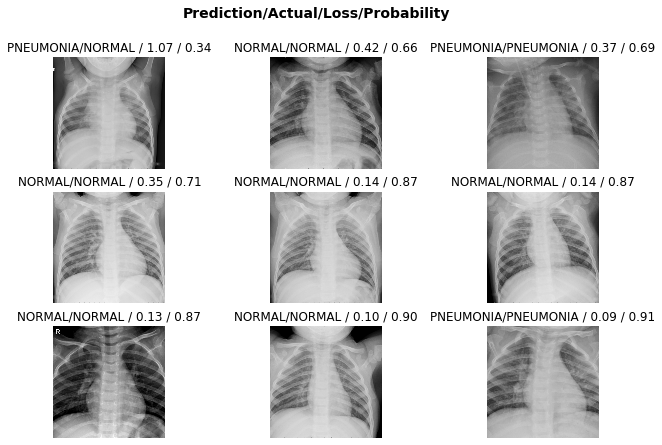

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

interp.plot_top_losses(9, figsize=(11,7))

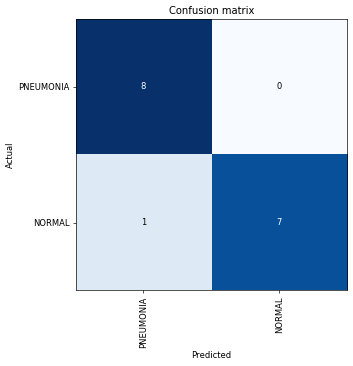

In [ ]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [ ]:
cm = interp.confusion_matrix()
tp,fn,fp,tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print(f'Accuracy: {(tp + tn) / (tp + tn + fp + fn):.2f}')
print(f'Precision: {(tp) / (tp + fp):.2f}')
print(f'Recall: {(tp) / (tp + fn):.2f}')
prec = (tp) / (tp + fp)
rec = (tp) / (tp + fn)
print(f'F1 score: {2*prec*rec / (prec + rec):.2f}')

Accuracy: 0.94
Precision: 0.89
Recall: 1.00
F1 score: 0.94


In [ ]:
learn.save('stage-2')

I wanted to check if this shows the same performance for the testset as well 

In [ ]:
def evaluate_model_from_interp(interp, data):
    # perform a "manual" evaluation of the model to take a look at predictions vs. labels and to
    # re-compute accuracy from scratch (to double check and also because I didn't find a quick way
    # to extract accuracy inside the guts of Fast.ai after a call to validate() on the test set...)
    print(f'Interp has {len(interp.y_true)} ground truth labels: {interp.y_true}')
    print(f'Interp yielded {len(interp.preds)} raw predictions. First two raw predictions are: {interp.preds[:2]}')
    print(f'The problem had {len(data.classes)} classes: {data.classes}') # data.c is just len(data.classes)
    
    print('')
    print(f'Pred -> GroundTruth = PredLabel -> GroundTruthLabel')
    
    ok_pred = 0
    
    for idx, raw_p in enumerate(interp.preds):
        pred = np.argmax(raw_p)
        if idx < 10:
           print(f'{pred} -> {interp.y_true[idx]} = {data.classes[pred]} -> {data.valid_ds.y[idx]}')
        if pred == interp.y_true[idx]:
           ok_pred += 1
    
    acc = ok_pred / len(interp.y_true)
    print(f'Overall accuracy of the model: {acc:0.5f}')

In [ ]:
data2 = ImageDataBunch.from_folder(path, train="train", valid="test", ds_tfms=get_transforms(), size=224, bs=bs, classes = ['PNEUMONIA', 'NORMAL']).normalize(imagenet_stats)

**The validate method shows 89% accuracy on the test set below:**

In [ ]:
learn.data = data2
learn.validate()

[0.3150337, tensor(0.1058), tensor(0.8942)]

In [ ]:
interp = ClassificationInterpretation.from_learner(learn, ds_type=DatasetType.Valid)
evaluate_model_from_interp(interp, data2)

Interp has 624 ground truth labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

An alternate way of testing against the test data


In [ ]:
test_learn = cnn_learner(data2, models.vgg19_bn)
test_learn = test_learn.load('stage-2')

In [ ]:
test_interp = ClassificationInterpretation.from_learner(test_learn)

losses,idxs = test_interp.top_losses()

len(data2.valid_ds)==len(losses)==len(idxs)

True

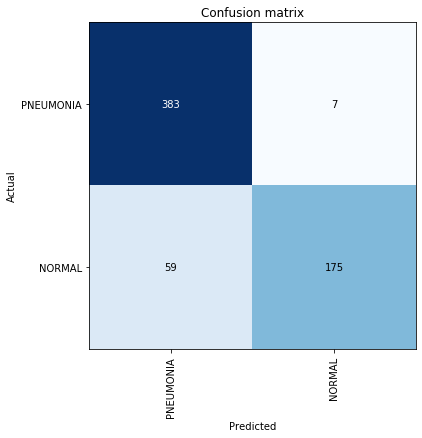

In [ ]:
test_interp.plot_confusion_matrix(figsize=(6,6))

In [ ]:
cm = test_interp.confusion_matrix()
tp,fn,fp,tn = cm[0][0], cm[0][1], cm[1][0], cm[1][1]
print(f'Accuracy: {(tp + tn) / (tp + tn + fp + fn):.2f}')
print(f'Precision: {(tp) / (tp + fp):.2f}')
print(f'Recall: {(tp) / (tp + fn):.2f}')
prec = (tp) / (tp + fp)
rec = (tp) / (tp + fn)
print(f'F1 score: {2*prec*rec / (prec + rec):.2f}')

Accuracy: 0.89
Precision: 0.87
Recall: 0.98
F1 score: 0.92


In [ ]:
evaluate_model_from_interp(test_interp, data2)

Interp has 624 ground truth labels: tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

# Skip this section

**Using the test set as the validation set and training a new model - the architecture remains the same (good enough accuray achieved)**

In [ ]:
learn_test = cnn_learner(data2, models.vgg19_bn, metrics=error_rate)

In [ ]:
learn_test.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.411585,0.356149,0.110577,03:41
1,0.259544,0.417354,0.110577,03:40
2,0.185704,0.322573,0.116987,03:40
3,0.150767,0.374769,0.131410,03:40


In [ ]:
learn_test.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


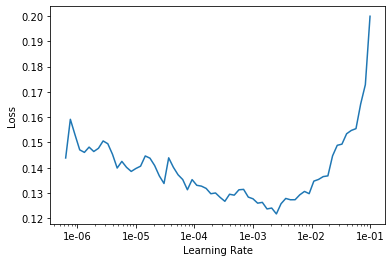

In [ ]:
learn_test.recorder.plot()

In [ ]:
learn_test.unfreeze()
learn_test.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.124831,0.370573,0.120192,03:46
1,0.112540,0.265627,0.086538,03:46
2,0.071763,0.297853,0.089744,03:52
3,0.065524,0.309942,0.088141,03:50
4,0.056417,0.284118,0.080128,03:52


In [ ]:
learn_test.data = data
learn_test.validate()

[0.023992274, tensor(0.)]

**Using the pretrained resnet34 model this time on the same training data to see the difference in performance - more scope for fine-tuning**

In [ ]:
learn2 = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 295MB/s]


In [ ]:
learn2.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.457004,0.197479,0.125000,03:16
1,0.270498,0.157845,0.000000,03:16
2,0.187853,0.207496,0.125000,03:16
3,0.161455,0.259254,0.125000,03:17


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


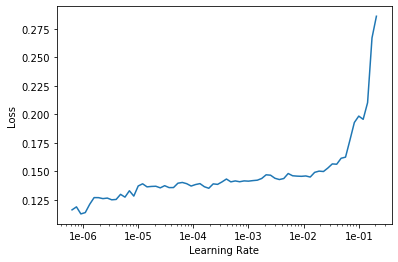

In [ ]:
learn2.lr_find()
learn2.recorder.plot()

In [ ]:
learn2.unfreeze()
learn2.fit_one_cycle(5, max_lr=slice(2e-6, 3e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.141014,0.200051,0.125000,03:19
1,0.132575,0.228367,0.125000,03:15
2,0.123808,0.124295,0.062500,03:15
3,0.117970,0.193986,0.062500,03:13
4,0.119481,0.234566,0.125000,03:13


In [ ]:
learn2.data = data2
learn2.validate()

[0.29724252, tensor(0.0849)]

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


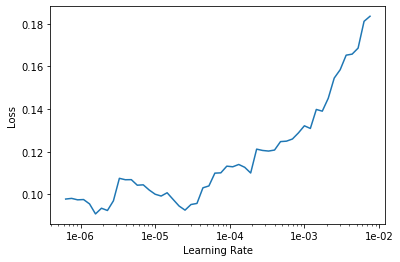

In [ ]:
learn2.lr_find()
learn2.recorder.plot()